# CP1 Data Story
## By Logan Larson

Most of us are left to experience the world of professional sports from the outside, looking in, with no alternative but to compete in imaginary realms absent of any athletic barriers to entry. The baseball community realized this in the 1980s and ultimately devised a game within a game that could allow the average fan to get a taste of professional baseball. How it worked was generally straightforward: Participants took turns claiming individual athletes within the MLB before the season started, and as the season went on, whoever put together the most statistically productive team usually won.

Known today as "fantasy baseball," this imaginary game only gained popularity with time and  nowadays there exists a version of it for practically every major American sport. Based on 2017 year-end data from the Fantasy Sports and Gaming Association, roughly 60 million (roughly 21 percent) poeple in the American/Canadian population (age 12-plus) were estimated to have participated in some capacity in 2017.

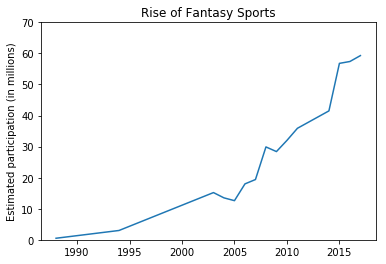

In [36]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import scipy as sp
import seaborn as sns
from six.moves import range



participation_data = pd.read_csv("fantasy_participation.csv")


plt.plot(participation_data['Year'], participation_data['Player_estimate']/1000000)
plt.ylim(0, 70)
plt.title("Rise of Fantasy Sports")
plt.ylabel("Estimated participation (in millions)")
plt.show()

Regardless of sport, the statistical production of any athlete always depends greatest on one factor: availability. The logic is intuitive in that an athlete must be available to compete in order to produce.

Therefore, paying attention to injuries is important for anyone particpating in a fantasy sport. And there may be no sport with less certainty around its players’ game-by-game availability than football in the National Football League, whose players, according to NFL Injury Analytics, have historically been about four times as likely to get injured in a practice or game than players in the NBA, MLB or NHL.

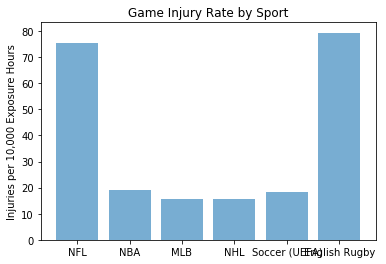

In [37]:
injury_data = pd.read_csv("injury_rates.csv")
o = injury_data['Sport']
y_pos = np.arange(len(o))
rate = injury_data['Injury_rate']

plt.bar(y_pos, rate, align='center', alpha=0.6)
plt.xticks(y_pos, o)

plt.title("Game Injury Rate by Sport")
plt.ylabel("Injuries per 10,000 Exposure Hours")
plt.show()

For a wide variety of reasons, recognizing the individual players that aren’t healthy enough to play can pose a significant advantage for the average fantasy football participant. Knowing which players are slated to benefit from that teammate’s absence is even more advantageous. Yet in either case, it’s always better to learn the information sooner than later — especially in high-stakes leagues with prize money at stake. The problem is that NFL teams have little incentive to provide the general public with perfectly accurate information on a real-time basis since that information could also provide a competitive advantage to its opponent. This often forces fantasy football participants to rely upon the media for injury-related information.

However, it usually isn’t enough to simply have the knowledge of these health updates since, again, there are instances when learning the updates only poses an advantage when you learn the information before your competition does. Therefore, a program that could analyze a credible news stream and alert players of injury updates — in real-time — would therefore be of significant utility to anyone who plays fantasy football. 

The most logical place to start building such a program is the Twitter feed of Adam Schefter, an award-winning NFL reporter who is widely considered the most credible NFL insider among the media. Collected and displayed below is a dataset of over 30,000 of his tweets 

In [38]:
df = pd.read_csv('clean_schefter_tweets3.csv')
del df['Unnamed: 0'] # get rid of unneeded column

In [39]:
df.head()

,DoW,Month,Day,Time,Year,Tweet,Timestamp,Date
0,Fri,Oct,27,18:58:04,2017,Here’s the article from @SethWickersham and @D...,2017-10-27 18:58:04,Oct 27 2017
1,Wed,Dec,19,18:23:26,2018,FOX analyst DeMarco Murray is considering taki...,2018-12-19 18:23:26,Dec 19 2018
2,Mon,Jan,4,19:09:57,2010,"For time being, Raiders coaches including HC T...",2010-01-04 19:09:57,Jan 04 2010
3,Tue,Sep,6,10:57:48,2016,"One of best days of year: OGBA draft at 630, f...",2016-09-06 10:57:48,Sep 06 2016
4,Mon,Jan,7,04:51:35,2013,Seahawks fear DE Chris Clemons tore his ACL an...,2013-01-07 04:51:35,Jan 07 2013


In [40]:
len(df)

33041

In [41]:
df['DoW'].value_counts()

Mon    5699
Sun    5124
Tue    4944
Wed    4812
Fri    4703
Thu    4580
Sat    3179
Name: DoW, dtype: int64

It's a slight surprise that he wasn't most active on Sundays, when the vast majority of NFL games are played, but its possible he's most active Monday because of extensive follow-ups on injuries that happened in the games the day before.

In [42]:
df['Month'].value_counts()

Mar    4167
Jan    3536
Sep    3395
Oct    3116
Apr    3033
Dec    3029
Nov    2908
Aug    2721
Jul    2024
Feb    1883
May    1750
Jun    1479
Name: Month, dtype: int64

It's also surprising he was most active in March because the NFL's regular season runs mid-September through December/early January.

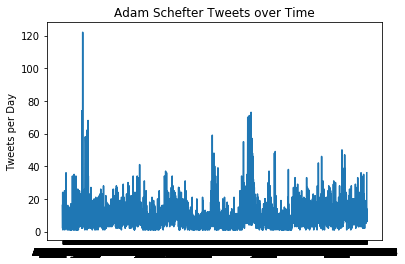

In [43]:
def count_elements(seq) -> dict:
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted = count_elements(df['Date'])
lists = sorted(counted.items())

x, y = zip(*lists)

plt.title("Adam Schefter Tweets over Time")
plt.ylabel("Tweets per Day")
plt.plot(x, y)
plt.show()

In [44]:
# check out the anomaly

max(zip(counted.values(), counted.keys()))

(122, 'Apr 24 2010')

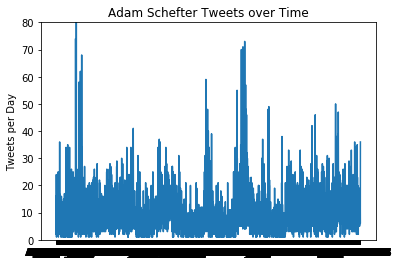

In [45]:
plt.ylim(0, 80, 10)
plt.title("Adam Schefter Tweets over Time")
plt.ylabel("Number of tweets")
plt.plot(x, y)
plt.show()

Once I finish labeling the tweets as injury-relevant or not, I can further analyze which keywords will help me categorize future tweets.

In [46]:
labeled = pd.read_csv("labeled_schefter_tweets.csv")

In [47]:
labeled.head()

,Timestamp,Date,DoW,Month,Day,Time,Year,Class,Tweet
0,Apr 01 2010 01:34:04,Apr 01 2010,Thu,Apr,1,01:34:04,2010,X,RT @will_e_777: Where does Elam rank in best k...
1,Apr 01 2010 13:01:03,Apr 01 2010,Thu,Apr,1,13:01:03,2010,X,A prediction that's no April Fool's joke: Ther...
2,Apr 01 2010 13:22:24,Apr 01 2010,Thu,Apr,1,13:22:24,2010,T,Giants re-signed restricted free agent guard K...
3,Apr 01 2010 14:12:35,Apr 01 2010,Thu,Apr,1,14:12:35,2010,X,@ProFootballTalk Aaron Schobel is not retiring...
4,Apr 01 2010 14:19:29,Apr 01 2010,Thu,Apr,1,14:19:29,2010,X,Jimmy Clausen now scheduled to fly to Washingt...


In [48]:
labeled['Class'].value_counts()

X    25576
T     3978
I     3487
Name: Class, dtype: int64

An initial goal of my project is to take Schefter's tweets and categorize them into three categories: X, T and I. The 'T' label designates a tweet is transactionary or, in other words, any tweet that contains information about any player transactions that impact their contract status or playing eligibility. The 'I' label designates any workload impediments such as injury updates or role changes. The 'X' label is any and everything else.

We care about 'T' tweets because we need to know which players are on which teams -- and within those teams, which of the players are eligible to compete in the first place. Then we get more specific with the 'I' tweets to gain further information on which eligible players are healthy to play and, subsequently, how much playing time they can be expected to receive. The 'X' tweets are then entirely irrelevant for our purposes since they don't offer us any further, actionable information. 

For the purposes of fantasy football, the 'I' tweets are generally most important to us because the most relevant players don't often change teams, but the injury bug doesn't discriminate.

In [49]:
allfreq = labeled.Tweet.str.split(expand=True).stack().value_counts()

# view his most used words
all.head(15)

to      15356
the     12046
and      9201
a        8596
in       7429
for      7192
on       6631
is       6243
of       5617
with     5006
RT       3940
will     3899
per      3705
his      3176
be       3112
dtype: int64

It's no surprise at all to see so many conjunctions atop this list.

In [50]:
itweets = labeled['Class'] == 'I' # create Boolean list
itweets2 = labeled[itweets]
ifreq = itweets2.Tweet.str.split(expand=True).stack().value_counts()
ifreq.head(15)

to      1725
is      1301
a       1040
for     1013
will     947
and      911
WR       744
his      707
RB       689
per      673
play     621
the      570
with     547
out      540
as       536
dtype: int64

In [51]:
ttweets = labeled['Class'] == 'T' # create Boolean list
ttweets2 = labeled[ttweets]
tfreq = ttweets2.Tweet.str.split(expand=True).stack().value_counts()
tfreq.head(15)

to           1576
a            1440
and          1237
on           1142
signed       1058
the          1017
with         1003
per           818
former        699
for           653
have          622
WR            575
source.       540
released      518
agreement     514
dtype: int64

Above are the word counts for each subset of 'I' and 'T' tweets, respectively. What's interesting is that the transactionary tweets commonly use words in some form of a past tense, like 'signed' and 'released', compared to the impediment terms that frequently use words like 'is' and 'will' that suggest future or current tenses.

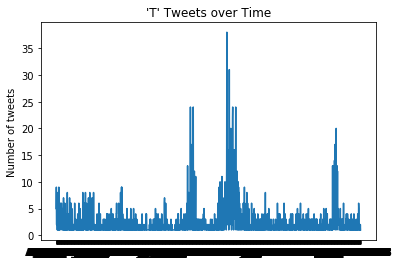

In [56]:
counted2 = count_elements(ttweets2['Date'])
lists = sorted(counted2.items())

x, y = zip(*lists)

plt.title("'T' Tweets over Time")
plt.ylabel("Number of tweets")
plt.plot(x, y)
plt.show()

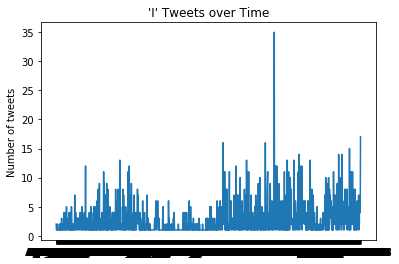

In [57]:
counted3 = count_elements(itweets2['Date'])
lists = sorted(counted3.items())

x, y = zip(*lists)

plt.title("'I' Tweets over Time")
plt.ylabel("Number of tweets")
plt.plot(x, y)
plt.show()

In the latter graph, it seems Schefter has become more involved with injury updates over time. Meanwhile, the former graph suggests some offseasons may have more active free-agent markets than other years. But most importantly, when you compare the trend of 'I' tweets to all of his tweets, his total volume seems cyclically stable - but if it holds that he truly has been more active in the injury department - then his total percentage of 